In [ ]:
!pip install transformers datasets pandas numpy scikit-learn matplotlib seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import pandas as pd

zip_path = '/content/drive/MyDrive/Group 1/pan25-generative-ai-detection-task1-train.zip'
with zipfile.ZipFile(zip_path) as z:
    with z.open('train.jsonl') as f:
        df = pd.read_json(f, lines=True)

In [ ]:
print(df.head())

                                     id  \
0  ea468d03-1973-5039-86b2-ff225bb92c4e   
1  0d05f269-6d67-521d-9b5d-cc18f482c6c1   
2  c2ec79f3-da80-58f8-bef0-3e0ea7ab072f   
3  4ad37c58-0bb7-536b-997d-cfccabd0d094   
4  07747b0c-5051-5e0d-8096-b4d4ed8bd98e   

                                                text  \
0  Duke Ellington, a titan of jazz, revolutionize...   
1  I reflected on the shifting dynamics of media ...   
2  In F. Scott Fitzgerald's "The Great Gatsby," t...   
3  I still chuckle when I think about that time I...   
4  Yoga, originating in ancient India, encompasse...   

                          model  label   genre  
0          falcon3-10b-instruct      1  essays  
1                       o3-mini      1  essays  
2                        gpt-4o      1  essays  
3  deepseek-r1-distill-qwen-32b      1  essays  
4              gemini-2.0-flash      1  essays  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23707 entries, 0 to 23706
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      23707 non-null  object
 1   text    23707 non-null  object
 2   model   23707 non-null  object
 3   label   23707 non-null  int64 
 4   genre   23707 non-null  object
dtypes: int64(1), object(4)
memory usage: 926.2+ KB
None


In [ ]:
print(df['model'].value_counts())

model
human                           9101
gpt-3.5-turbo                   1374
gpt-4o-mini                     1358
gpt-4o                          1336
ministral-8b-instruct-2410      1100
gemini-2.0-flash                1079
o3-mini                         1075
gemini-1.5-pro                  1072
llama-3.1-8b-instruct           1063
deepseek-r1-distill-qwen-32b     901
falcon3-10b-instruct             879
llama-3.3-70b-instruct           405
gpt-4.5-preview                  278
gpt-4-turbo-paraphrase           276
gemini-pro                       276
gpt-4-turbo                      272
qwen1.5-72b-chat-8bit            271
llama-2-70b-chat                 269
mistral-7b-instruct-v0.2         266
gemini-pro-paraphrase            265
text-bison-002                   265
mixtral-8x7b-instruct-v0.1       264
llama-2-7b-chat                  262
Name: count, dtype: int64


In [ ]:
print(df['label'].value_counts())

label
1    14606
0     9101
Name: count, dtype: int64


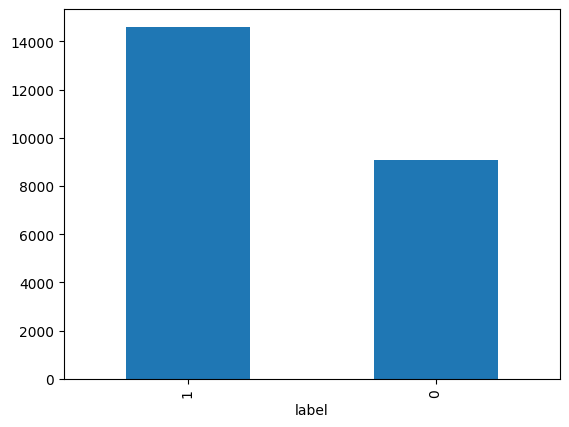

In [ ]:
import matplotlib.pyplot as plt
df['label'].value_counts().plot(kind='bar')
plt.show()

genre
fiction    14697
essays      4661
news        4349
Name: count, dtype: int64


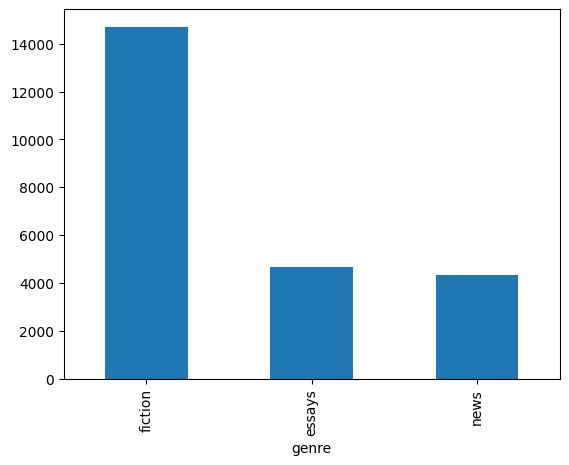

In [ ]:
print(df['genre'].value_counts())
import matplotlib.pyplot as plt
df['genre'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
human__df = df[df['label'] == 0]
human_genre_counts = human__df['genre'].value_counts()
print("Human generated texts by genre:\n" ,human_genre_counts)

Human generated texts by genre:
 genre
fiction    7300
essays      931
news        870
Name: count, dtype: int64


count    23707.000000
mean       621.226136
std        210.686723
min         33.000000
25%        489.000000
50%        635.000000
75%        714.000000
max       4892.000000
Name: text_length, dtype: float64


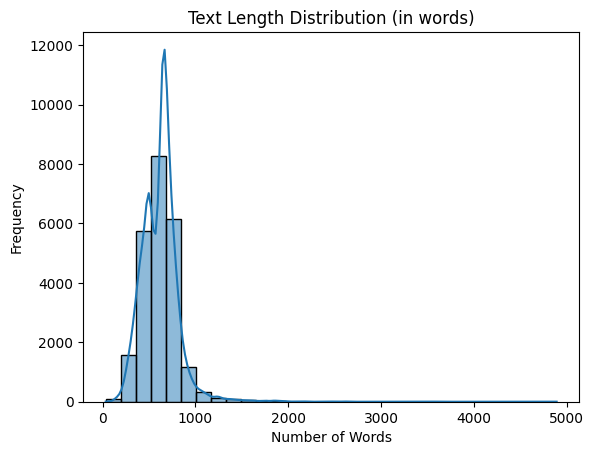

In [ ]:
import seaborn as sns

df['text_length'] = df['text'].apply(lambda x: len(x.split()))

print(df['text_length'].describe())

sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


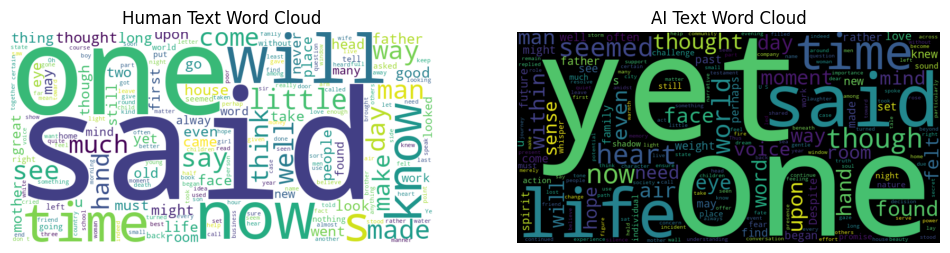

In [ ]:
from wordcloud import WordCloud

human_text = " ".join(df[df['label'] == 0]['text'].tolist())
ai_text = " ".join(df[df['label'] == 1]['text'].tolist())

wc_human = WordCloud(width=800, height=400, background_color='white').generate(human_text)
wc_ai = WordCloud(width=800, height=400, background_color='black').generate(ai_text)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wc_human, interpolation='bilinear')
plt.title("Human Text Word Cloud")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wc_ai, interpolation='bilinear')
plt.title("AI Text Word Cloud")
plt.axis("off")

plt.show()


In [ ]:
df['capital_ratio'] = df['text'].apply(lambda x: sum(1 for c in x if c.isupper()) / (len(x)+1))
df['punctuation_ratio'] = df['text'].apply(lambda x: sum(1 for c in x if c in '.,;!?') / (len(x)+1))

print(df.groupby('label')[['capital_ratio', 'punctuation_ratio']].mean())


       capital_ratio  punctuation_ratio
label                                  
0           0.021196           0.024855
1           0.018643           0.021191


In [ ]:
print("\nHuman-written:")
print(df[df['label'] == 0]['text'].sample(2).values)

print("\nAI-generated:")
print(df[df['label'] == 1]['text'].sample(2).values)


Human-written:
['As for the Thirteen, the author feels that, on the strength of the details of this almost fantastic story, he can afford to give away yet another prerogative, though it is one of the greatest on record, and would possibly fetch a high price if brought into a literary auction mart; for the owner might inflict as many volumes on the public as La Contemporaine.[*]\n\nThe Thirteen were all of them men tempered like Byron’s friend Trelawney, the original (so it is said) of The Corsair. All of them were fatalists, men of spirit and poetic temperament; all of them were tired of the commonplace life which they led; all felt attracted towards Asiatic pleasures by all the vehement strength of newly awakened and long dormant forces. One of these, chancing to take up Venice Preserved for the second time, admired the sublime friendship between Pierre and Jaffir, and fell to musing on the virtues of outlaws, the loyalty of the hulks, the honor of thieves, and the immense power that

In [ ]:
!pip install textstat
import textstat

df['readability'] = df['text'].apply(textstat.flesch_reading_ease)
df.groupby('label')['readability'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,9101.0,64.170081,14.936537,-100.208781,54.427573,66.560988,75.634817,97.874456
1,14606.0,43.114416,21.884201,-261.351899,27.762945,44.501094,60.665920,96.440934


In [ ]:
hedges = ["likely", "possibly", "probably", "might", "perhaps", "may", "could"]
df['hedge_count'] = df['text'].apply(lambda x: sum(1 for h in hedges if h in x.lower()))
df.groupby('label')['hedge_count'].mean()

,hedge_count
label,
0,1.999560
1,1.336026


In [ ]:
df['starts_with'] = df['text'].apply(lambda x: x.split()[0].lower() if x.split() else 'none')
print(df.groupby(['label', 'starts_with']).size().sort_values(ascending=False).head(10))

label  starts_with
1      the            3356
       in             1453
       as             1119
0      the             798
1      i               362
       it              349
0      it              241
       i               199
1      a               194
0      "i              181
dtype: int64


In [ ]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
print(df.groupby('label')['word_count'].describe())

         count        mean         std    min    25%    50%    75%     max
label                                                                     
0       9101.0  695.456983  209.781448  150.0  634.0  670.0  726.0  4892.0
1      14606.0  574.972888  197.625755   33.0  436.0  546.0  700.0  2018.0


In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

human_texts = df[df['label'] == 0]['text']
ai_texts = df[df['label'] == 1]['text']

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
human_bow = vectorizer.fit_transform(human_texts).toarray().sum(axis=0)
ai_bow = vectorizer.fit_transform(ai_texts).toarray().sum(axis=0)

human_freq = dict(zip(vectorizer.get_feature_names_out(), human_bow))
ai_freq = dict(zip(vectorizer.get_feature_names_out(), ai_bow))

import pandas as pd
freq_df = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'human': human_bow,
    'ai': ai_bow
}).sort_values(by='human', ascending=False)

print(freq_df.head(10))


          word  human    ai
718   resolved  27302   896
503     letter  11615  1473
472   kindness  11521   984
465       john  11024  1646
887    thought  11001  3974
188     danced  10176  1353
584  narrative   9609  2938
549    medical   9105   916
429    husband   8753  1130
335  following   8657  1920


In [ ]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

df['sent_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df['avg_words_per_sent'] = df['word_count'] / (df['sent_count'] + 1)

df.groupby('label')[['sent_count', 'avg_words_per_sent']].mean()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,sent_count,avg_words_per_sent
label,,
0,34.281178,22.036481
1,27.388744,22.065305


In [ ]:
def type_token_ratio(text):
    words = text.split()
    return len(set(words)) / (len(words) + 1)

df['ttr'] = df['text'].apply(type_token_ratio)
df.groupby('label')['ttr'].describe()


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,9101.0,0.553814,0.042839,0.214552,0.529240,0.556869,0.581102,0.780793
1,14606.0,0.588731,0.060772,0.045861,0.555457,0.592129,0.625000,0.970588


In [ ]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42)

In [ ]:
from transformers import AutoTokenizer

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
import torch

class TextDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

train_dataset = TextDataset(train_encodings, train_labels)
val_dataset = TextDataset(val_encodings, val_labels)

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import Trainer, TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    eval_strategy="epoch",
    save_strategy="epoch",
    report_to="none"
    )

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)
trainer.train()
model.save_pretrained("my_finetuned_bert")
tokenizer.save_pretrained("my_finetuned_bert")

Epoch,Training Loss,Validation Loss
1,0.068600,0.168725
2,0.023500,0.025733


Epoch,Training Loss,Validation Loss
1,0.068600,0.168725
2,0.023500,0.025733
3,0.002800,0.043110


('my_finetuned_bert/tokenizer_config.json',
 'my_finetuned_bert/special_tokens_map.json',
 'my_finetuned_bert/vocab.txt',
 'my_finetuned_bert/added_tokens.json',
 'my_finetuned_bert/tokenizer.json')

In [ ]:
!zip -r my_finetuned_bert.zip my_finetuned_bert
from google.colab import files
files.download("my_finetuned_bert.zip")

In [ ]:
import numpy as np
import torch
from transformers import AutoTokenizer
import pandas as pd
import zipfile


zip_path_val = '/content/drive/MyDrive/Group 1/pan25-generative-ai-detection-task1-train.zip'
with zipfile.ZipFile(zip_path_val) as z:
    with z.open('val.jsonl') as f:
        df_val = pd.read_json(f, lines=True)

class TextDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

model_name = "bert-base-uncased"
try:
    tokenizer = AutoTokenizer.from_pretrained(model_name)
except NameError:
    model_name = "my_finetuned_bert"
    tokenizer = AutoTokenizer.from_pretrained(model_name)

val_texts = df_val['text'].tolist()
val_labels = df_val['label'].tolist()

val_encodings_predict = tokenizer(val_texts, truncation=True, padding=True)

val_dataset_predict = TextDataset(val_encodings_predict, val_labels)

predictions = trainer.predict(val_dataset_predict)

logits = predictions.predictions

y_pred = np.argmax(logits, axis=1)
y_true = predictions.label_ids

Classification Report:
               precision    recall  f1-score   support

           0     0.9936    0.9796    0.9866      1277
           1     0.9888    0.9965    0.9927      2312

    accuracy                         0.9905      3589
   macro avg     0.9912    0.9881    0.9896      3589
weighted avg     0.9906    0.9905    0.9905      3589



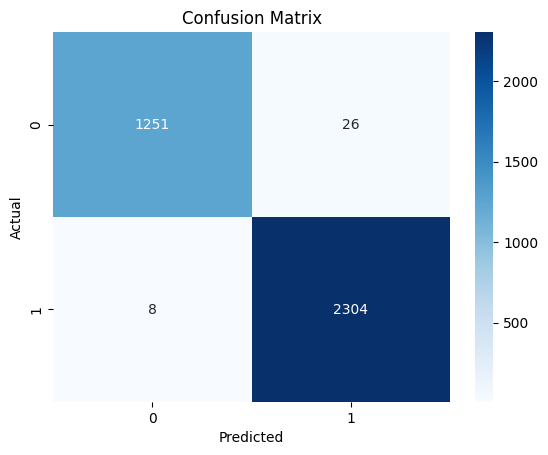

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch

print("Classification Report:\n", classification_report(y_true, y_pred, digits=4))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, logits[:, 1])

print("Accuracy:", round(accuracy, 4))
print("F1 Score:", round(f1, 4))
print("ROC-AUC:", round(roc_auc, 4))

Accuracy: 0.9905
F1 Score: 0.9927
ROC-AUC: 0.9996


In [ ]:
def predict_text_class(text):
    import torch
    # Ensure model and tokenizer are available and loaded
    if 'model' not in globals() or 'tokenizer' not in globals():
        print("Error: Model or tokenizer not loaded. Please run the training and saving cells first.")
        return None, None # Return None to indicate failure

    model.eval()

    device = next(model.parameters()).device

    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).item()
        probability = torch.softmax(logits, dim=1)[0][predicted_class].item()

    label = "Human-written" if predicted_class == 0 else "AI-generated"
    return label, probability # Return the label and probability

print("Enter text to classify (or type 'quit' to exit):")

while True:
    user_input = input("📝 Enter text: ")
    if user_input.lower() == 'quit':
        print("Exiting classifier.")
        break
    elif not user_input.strip(): # Handle empty input
        print("Please enter some text.")
        continue

    label, probability = predict_text_class(user_input)

    if label is not None: # Check if prediction was successful
        print(f"🔍 Prediction: {label} (Label: {probability:.4f})")
    print("-" * 30) # Separator for next input

Enter text to classify (or type 'quit' to exit):
📝 Enter text: quit
Exiting classifier.
